# Import libraries

In [24]:
# import libraries to get text from file and to making text language detection and visualization
import numpy as np
import whisper
from googletrans import Translator
from summa.summarizer import summarize
import gtts 
import re
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import tensorflow as tf

# Initialize parameters

In [25]:
#------------------------------------------------------------------------------------------------------#
#add GPU to run with CPU
list_physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(list_physical_devices[0], True)
#-------------------------------------------------------------------------------------------------------#

In [26]:
#-------------------------------------------------------------------------------------------------------#
# initialize some parameters
translator = Translator()
reg = re.compile(r'[a-zA-Z]')
reg2 = re.compile(r'[ا-ي]')
#-------------------------------------------------------------------------------------------------------#

# Build Functions

In [4]:
#-------------------------------------------------------------------------------------------------------#
#function to build model and get mixed text from audio
def building_model_and_get_text(filename):
    model = whisper.load_model("small")
    result = model.transcribe(filename)
    return result['text']
#-------------------------------------------------------------------------------------------------------#

In [5]:
#-------------------------------------------------------------------------------------------------------#
#function to summarize text using text rank
def summarize_text_to_arabic(arabic_text, ratio):
    summarized_text = summarize(text = arabic_text, ratio= ratio, language= 'arabic')
    return summarized_text.strip()
#-------------------------------------------------------------------------------------------------------#

In [6]:
#-------------------------------------------------------------------------------------------------------#
# function to translate english words into arabic words
def translate_english_words_to_arabic(total_text):
    total_text = total_text.split()
    total_text_translated = ''  
    for i in range(0, len(total_text)):
        if reg2.findall(total_text[i]) != [] and reg.findall(total_text[i]) != []:
            print(reg.findall(total_text[i]))
            print("Before : "+total_text[i])
            arabic_characters = reg2.findall(total_text[i])
            for j in arabic_characters:
                total_text[i] = total_text[i].replace(j,'')
            print("After : "+total_text[i])
            total_text[i] = (translator.translate(total_text[i], dest='ar')).text
        elif reg.findall(total_text[i]) != []:
            total_text[i] = (translator.translate(total_text[i], dest='ar')).text   
    for i in total_text:
        total_text_translated = total_text_translated + " " + i
    return total_text_translated.strip()

In [7]:
#-------------------------------------------------------------------------------------------------------#
# function to get the audio duration from input audio file
def get_audio_duration(file_name):
    data, sampling_rate = librosa.load(file_name)
    S = librosa.stft(data)
    duration = librosa.get_duration(S = S, sr = sampling_rate)
    return np.ceil(duration)
#-------------------------------------------------------------------------------------------------------#

In [8]:
#-------------------------------------------------------------------------------------------------------#
# function to save summarization text as audio
def save_sum_as_audio(sum_text):
    sum_file_mp3 = gtts.gTTS(sum_text, lang='ar', slow= False)
    sum_file_mp3.save("summarization.mp3")
    file_name = 'summarization.mp3'
    return file_name
#-------------------------------------------------------------------------------------------------------#

In [9]:
#-------------------------------------------------------------------------------------------------------#
# function to show audio signal and some information about the input audio file like sampling rate, duration and so on...
def get_audio_information(file_name):
    data, sampling_rate = librosa.load(file_name)
    print("*************************************Audio Information**************************************")
    print("Sampling Rate is : {}".format(sampling_rate))
    print("Audio Duration is : {} Seconds".format(get_audio_duration(file_name)))
    print("*******************************************************************************************\n")
    print("*************************************Audio Wave**********************************************")
    plt.figure(figsize=(10,5))
    librosa.display.waveshow(data, sr = sampling_rate)
    plt.title("Audio Wave")
    plt.tight_layout()
    plt.show()
    print("********************************************************************************************\n")
    print("*************************************Audio Wave Information***********************************")
    plt.figure(figsize=(10,5))
    melspec = librosa.feature.melspectrogram(y= data, sr= sampling_rate)
    librosa.display.specshow(melspec, y_axis='mel', x_axis='time')
    plt.colorbar()
    plt.title("Audio Wave Information")
    plt.tight_layout()
    plt.show()
    print("********************************************************************************************")
    print("*************************************Audio Wave MFCC***********************************")
    plt.figure(figsize=(10,5))
    mfcc = librosa.feature.mfcc(y= data, sr= sampling_rate)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.colorbar()
    plt.title("Audio Wave MFCC")
    plt.tight_layout()
    plt.show()
    print("********************************************************************************************")
#-------------------------------------------------------------------------------------------------------#

In [31]:
#-------------------------------------------------------------------------------------------------------#
def make_text_sentences(text):
  text_list = text.split()
  final_text = ''
  for i in range(len(text_list)):
    final_text = final_text +" "+ text_list[i]
    if i % 50 == 0 :
      final_text += '\n'
  return final_text
  #-------------------------------------------------------------------------------------------------------#

# Read mixed audio file and get information

c:\Users\hrelh\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


*************************************Audio Information**************************************
Sampling Rate is : 22050


c:\Users\hrelh\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Audio Duration is : 542.0 Seconds
*******************************************************************************************

*************************************Audio Wave**********************************************


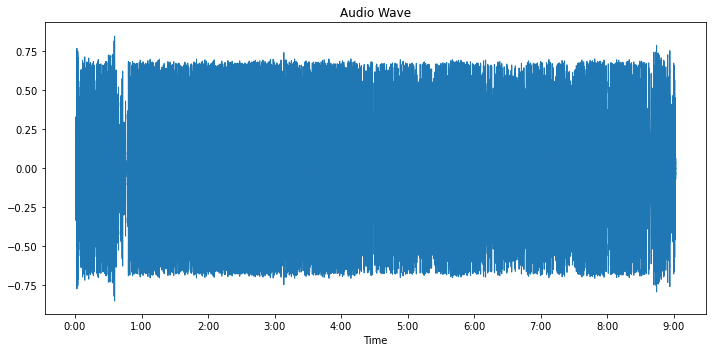

********************************************************************************************

*************************************Audio Wave Information***********************************


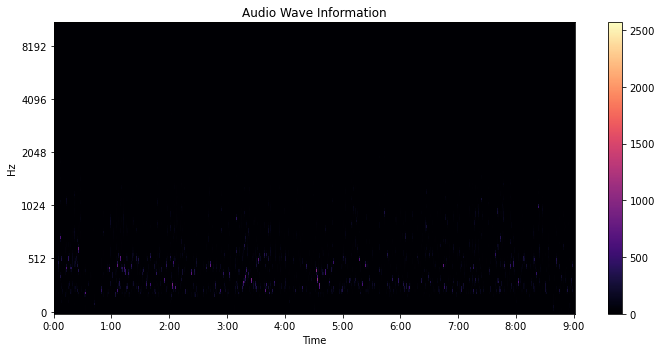

********************************************************************************************
*************************************Audio Wave MFCC***********************************


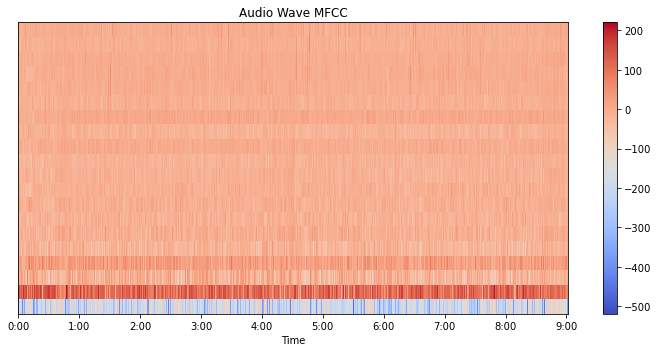

********************************************************************************************


In [10]:
#-------------------------------------------------------------------------------------------------------#
get_audio_information("mix.mp3")
#-------------------------------------------------------------------------------------------------------#

# Get text from audio

In [11]:
#-------------------------------------------------------------------------------------------------------#
text_in_audio = building_model_and_get_text("mix.mp3")
#-------------------------------------------------------------------------------------------------------#

c:\Users\hrelh\anaconda3\lib\site-packages\whisper\transcribe.py:70: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Detected language: arabic


In [16]:
#-------------------------------------------------------------------------------------------------------#
print(text_in_audio)
#-------------------------------------------------------------------------------------------------------#

 من ساعة مقرير دا اتوميك هابت سبطلت تحطي سكر دي دا هتعمل دايت؟ لا بس هالثير ليفس طايل عموما أنا كل سنة بقول لنفسي ان من اول يناير بحقون انسان جديد بس بيجي كل يناير ونفسي تسغور لي كده وقول لنا ما حدتش يناير بتاعني سنة تلاقوري تكتب بتعال عادات الزرية جيمس كلير بيقول لك ان التغييرات الكبيرة في حالتنا ما ينفاش تحصل بشكل درومي ومالحمد بيقول ان العادات ما بتتخيلي اشفق زي ما المواد بتتكون من زرط صغيرة فحنا كما ممكن نعمل عادات من تغيير تفاصيل صغيرة دا درس اقراءة تانية ابتدائية دا ولكن دا كنتم تحبون جيمس كلير وانتبقى عمل like وشير وسبسكراي ونبدأ الحلقة سامع عليكم وحطلو باكيد العادات بيهيب يرز او سيوكيات ما بنفكرش قبل ما نعملها تتعمل تلقائي كده على اوطو بايم فجيمس كلير بيقول لك العب السهل ابتدق بتعديلات زرية صغيرة عشان بعد شوية تبقى سهل تعملها تلقائي وانت مش واختبق مثلا عايزها بقومة اهدا وقلل زي هروح كلاسز يوغة وعمل تمرين ساعة كل يوم واعتزل ما يؤذيني الولعيين نفسهم دي حاجات عمرهم هات تعمل تلقائي وانت مش واختبقى بايلك دي قرارات بتخذيها بشكل واعي و بتفضلها وقت و بتعملها ترتبات يعني دي مش تغييرات ت

# Translate English words into Arabic and making some preprocessing in mixed text

In [32]:
#-------------------------------------------------------------------------------------------------------#
# Translate English words
translated_text = translate_english_words_to_arabic(text_in_audio)
#-------------------------------------------------------------------------------------------------------#

In [33]:
#-------------------------------------------------------------------------------------------------------#
print(translated_text)
#-------------------------------------------------------------------------------------------------------#

من ساعة مقرير دا اتوميك هابت سبطلت تحطي سكر دي دا هتعمل دايت؟ لا بس هالثير ليفس طايل عموما أنا كل سنة بقول لنفسي ان من اول يناير بحقون انسان جديد بس بيجي كل يناير ونفسي تسغور لي كده وقول لنا ما حدتش يناير بتاعني سنة تلاقوري تكتب بتعال عادات الزرية جيمس كلير بيقول لك ان التغييرات الكبيرة في حالتنا ما ينفاش تحصل بشكل درومي ومالحمد بيقول ان العادات ما بتتخيلي اشفق زي ما المواد بتتكون من زرط صغيرة فحنا كما ممكن نعمل عادات من تغيير تفاصيل صغيرة دا درس اقراءة تانية ابتدائية دا ولكن دا كنتم تحبون جيمس كلير وانتبقى عمل مثل وشير وسبسكراي ونبدأ الحلقة سامع عليكم وحطلو باكيد العادات بيهيب يرز او سيوكيات ما بنفكرش قبل ما نعملها تتعمل تلقائي كده على اوطو بايم فجيمس كلير بيقول لك العب السهل ابتدق بتعديلات زرية صغيرة عشان بعد شوية تبقى سهل تعملها تلقائي وانت مش واختبق مثلا عايزها بقومة اهدا وقلل زي هروح كلاسز يوغة وعمل تمرين ساعة كل يوم واعتزل ما يؤذيني الولعيين نفسهم دي حاجات عمرهم هات تعمل تلقائي وانت مش واختبقى بايلك دي قرارات بتخذيها بشكل واعي و بتفضلها وقت و بتعملها ترتبات يعني دي مش تغييرات تبت

In [34]:
#-------------------------------------------------------------------------------------------------------#
sentences = make_text_sentences(translated_text)
#-------------------------------------------------------------------------------------------------------#

In [35]:
#-------------------------------------------------------------------------------------------------------#
print(sentences)
#-------------------------------------------------------------------------------------------------------#

 من
 ساعة مقرير دا اتوميك هابت سبطلت تحطي سكر دي دا هتعمل دايت؟ لا بس هالثير ليفس طايل عموما أنا كل سنة بقول لنفسي ان من اول يناير بحقون انسان جديد بس بيجي كل يناير ونفسي تسغور لي كده وقول لنا ما حدتش يناير بتاعني سنة تلاقوري تكتب بتعال عادات الزرية
 جيمس كلير بيقول لك ان التغييرات الكبيرة في حالتنا ما ينفاش تحصل بشكل درومي ومالحمد بيقول ان العادات ما بتتخيلي اشفق زي ما المواد بتتكون من زرط صغيرة فحنا كما ممكن نعمل عادات من تغيير تفاصيل صغيرة دا درس اقراءة تانية ابتدائية دا ولكن دا كنتم تحبون جيمس كلير وانتبقى
 عمل مثل وشير وسبسكراي ونبدأ الحلقة سامع عليكم وحطلو باكيد العادات بيهيب يرز او سيوكيات ما بنفكرش قبل ما نعملها تتعمل تلقائي كده على اوطو بايم فجيمس كلير بيقول لك العب السهل ابتدق بتعديلات زرية صغيرة عشان بعد شوية تبقى سهل تعملها تلقائي وانت مش واختبق مثلا عايزها بقومة اهدا
 وقلل زي هروح كلاسز يوغة وعمل تمرين ساعة كل يوم واعتزل ما يؤذيني الولعيين نفسهم دي حاجات عمرهم هات تعمل تلقائي وانت مش واختبقى بايلك دي قرارات بتخذيها بشكل واعي و بتفضلها وقت و بتعملها ترتبات يعني دي مش تغييرا

# Summarize

In [36]:
#-------------------------------------------------------------------------------------------------------#
# Get Summarizaed From Mixed Text using text rank
summarized_text = summarize_text_to_arabic(sentences, 0.3)
#-------------------------------------------------------------------------------------------------------#

In [37]:
#-------------------------------------------------------------------------------------------------------#
print(summarized_text)
#-------------------------------------------------------------------------------------------------------#

عمل مثل وشير وسبسكراي ونبدأ الحلقة سامع عليكم وحطلو باكيد العادات بيهيب يرز او سيوكيات ما بنفكرش قبل ما نعملها تتعمل تلقائي كده على اوطو بايم فجيمس كلير بيقول لك العب السهل ابتدق بتعديلات زرية صغيرة عشان بعد شوية تبقى سهل تعملها تلقائي وانت مش واختبق مثلا عايزها بقومة اهدا
وقلل زي هروح كلاسز يوغة وعمل تمرين ساعة كل يوم واعتزل ما يؤذيني الولعيين نفسهم دي حاجات عمرهم هات تعمل تلقائي وانت مش واختبقى بايلك دي قرارات بتخذيها بشكل واعي و بتفضلها وقت و بتعملها ترتبات يعني دي مش تغييرات تبتدي بها و بإزاوية عليها بقى كل شوية تفصيلة صغيرة
كمان كامسانة هتلاقي التغيير اللي نفسك في حصل بكل لسلسة من غير مقاومة ولا انتكاسة و دي ميزة ان عانينا تبقى على العادية مش الهدف انت ممكن تخسها 20 كيلو في شهرين ممكن تقريك تبقى اسبوع و بنتك ممكن تجبر بخطرك و توضى بقوضتها و كده تم تحقيق الهدف بنجاح
المقارمش و تخضر الانشينات و اخيرا مرحلة الريورت هتاستمتاع بأرمشة الداجاج ببقى عيدة بنسبة للكيو بيقولك خليها واضحة هي قديل واضحة كل حاجة الوضوح شعار المرحل رأيب نفسك و عرف عادتك اللي بوازح حياتك و العادت اللي انت محتاجها

# Create audio file with summarization text

In [40]:
#-------------------------------------------------------------------------------------------------------#
# Save final audio summarized file
final_summarizad_audio_file = save_sum_as_audio(summarized_text)
#-------------------------------------------------------------------------------------------------------#